### Programming for Data Analysis 2020 Submission

#### GMIT Higher Diploma in Data Analytics

#### Submitted by Fiona Lee - 3 December 2021


This project creates and models a simulated data set related to a chosen real-world phenomenon using the numpy.random package in Python.  This approach is taken rather than collecting the data.

The elements explored will be:

(i)   Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.

(ii)  Investigate  the  types  of  variables  involved,  their  likely  distributions,  and  their relationships with each other.

(iii) Synthesise/simulate a data set as closely matching their properties as possible.

(iv)  Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be     displayed in an output cell within the notebook.

### Project Outline:

#### Factors affecting length of stay of dogs in animal shelters 

For this project I generated simulated data on the factors that contribute to the duration of a dog's length of stay in an animal shelter from entry to adoption/foster/euthenasia.

I concluded the main measurable factors that influence the duration of a dog's stay are:
    
1. Age
2. Gender
3. Pedigree  
4. Size

I will explore each of these factors in the following sections and how they combined to affect a dog's likelyhood of achieving a speedy adoption or otherwise.

### Import Modules:

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Research:

My research found plentiful statistics in relation to US animal shelters (see below) which I initially thought could be applied to extrapoloate the data for Irish shelters. On further investigation however I found that there are fundamental differences between the US and Ireland due to lower euthenasia rates and longer average shelter stays in Ireland.  For this reason, my approach has been to use the limited data from UK studies where available and to use the US statistics as a guide to estimate the metrics for Ireland.

The 'Dogs Trust' dataset provides high level summary information based on 2,806 dogs in the UK shelter.  This information in this dataset was supplemented by the findings of the 'Austin' dataset which provides more detailed information from the US.

#### The Dogs Trust Dataset:

In [2]:
#Import the 'Dogs Trust' dataset:

df1 = pd.read_excel('Dogs-Trust.xlsx',usecols = [0,1,8,9],skiprows=[i for i in range(17,24)])
#https://thispointer.com/pandas-skip-rows-while-reading-csv-file-to-a-dataframe-using-read_csv-in-python/
#https://www.tandfonline.com/doi/abs/10.1080/10888700903369255?journalCode=haaw20
df1.index = np.arange(1, len(df1) + 1) #To reset the index to start at 1 instead of zero
#https://stackoverflow.com/questions/32249960/in-python-pandas-start-row-index-from-1-instead-of-zero-without-creating-additi

df1

,Category,Variable,Number of Dogs,% of Total
1,TOTAL,TOTAL,2806,100.0
2,Gender,Male,1595,56.8
3,Gender,Female,1211,43.2
4,Pedigree,Crossbred,2220,79.1
5,Pedigree,Purebred,586,20.9
6,Size,Small (<10 kg),629,22.4
7,Size,Medium (10-30 kg),1681,59.9
8,Size,Large (>30 kg),495,17.6
9,Size,Unknown,1,0.1
10,Age,< 6 months,398,14.2


#### The Austin Dataset (US):

In [3]:
#Import 'Austin' dataset:

df2 = pd.read_excel('Austin-Dataset.xlsx',usecols = [0,11,12,13,14],index = False)
#https://data.world/rdowns26/austin-animal-shelter/workspace/file?filename=Austin_Animal_Center_Intakes.csv

df2.sort_values("ID", inplace = True)#Sort the dataframe by column "ID"
df2.drop_duplicates(subset ="ID",keep = False, inplace = True)#Remove any duplicate ID entries
#https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/

#Option to print the entire Austin dataset dataframe
pd.set_option("display.max_rows",30000)#Display all entries
#df2

In [4]:
df2.describe()

,ID,Age_Bucket,Gender,Pedigree,Size
count,27376,27376,27376,27376,27376
unique,27376,7,2,2,4
top,A708764,1-3 years,Male,Crossbreed,Large
freq,1,12675,14561,25447,10622


In [5]:
#Option to summarise by Age Bucket:

#print("\n% of Total Samples by Age Category\n")
#pd.set_option("display.precision", 1)# Use 1 decimal places in output display#df2 = df2.drop('ID', axis=1)
#df2.groupby( ['Age_Bucket']).count() #show values
#df2.groupby(['Age_Bucket']).count()/df2.shape[0]*100 # show percentages
#https://stackoverflow.com/questions/23377108/pandas-percentage-of-total-with-groupby

In [6]:
#Option to summarise by Gender:

#print("\n% of Total Samples by Gender\n")
#pd.set_option("display.precision", 1)# Use 1 decimal places in output display
#df2.groupby( ['Gender'] ).count()
#df2.groupby(['Gender']).count()/df2.shape[0]*100 # show percentages

In [7]:
#Option to summarise by Pedigree:

#print("\n% of Total Samples by Pedigree\n")
#pd.set_option("display.precision", 0)# Use 0 decimal places in output display
#df2.groupby( ['Pedigree'] ).count()
#df2.groupby(['Pedigree']).count()/df2.shape[0]*100 # show percentages

In [8]:
#Option to summarise by Size:

#print("\n% of Total Samples by Size\n")
#pd.set_option("display.precision", 1)# Use 1 decimal places in output display
#df2.groupby( ['Size'] ).count()
#df2.groupby(['Size']).count()/df2.shape[0]*100 # show percentages

***

### Analysis of Key Variables:

### Age: 

#### Research & Assumptions:

###### UK:  Puppy (0-1 years) 36%; Adult (1-3 years) 29%; Adult (4-6 years) 19% Senior (7+) 16% (Source: Dogs Trust Dataset)
UK: <6 mths 14%; 6-12 mths 22%; 1 year 12%;  2 years 11%; 3 years 6%; 4 years 8%; 5 years 7%; 6 years 4%; 7-9 years+ 13%; 10 yrs+ 3% (Extrapolated from US Study)

UK Dogs Trust study: https://www.tandfonline.com/doi/full/10.1080/10888700903369255

###### US: Puppy (0-1 years) 31%; Adult (1-3 years) 46%; Adult (4-6 years) 14% Senior (7+) 9% (Source: Austin Dataset)
US: < 1 year 31%; 1 year 19%; 2 years 17%; 3 years 10%; 4 years 6%; 5 years 5%; 6 years 3%; 7-9 years+ 6%;10 yrs+ 3%

US Study: https://faunalytics.org/understanding-the-factors-that-lead-to-successful-dog-adoptions/ 

US Study: https://data.world/rdowns26/austin-animal-shelter/workspace/file?filename=Austin_Animal_Center_Intakes.csv 

###### Gender: 

#### Research & Assumptions:

###### UK: The split of male to female dogs based on 2,806 dogs in the 'Dogs Trust dataset' was 57% male and 43% female.
UK Dogs Trust study: https://www.tandfonline.com/doi/full/10.1080/10888700903369255

###### US: The split of male to female dogs based on the 'Austin animal shelter dataset' was 53% male and 47% female.
US Study: https://data.world/rdowns26/austin-animal-shelter/workspace/file?filename=Austin_Animal_Center_Intakes.csv 

###### Close to equal numbers of male and female dogs were surrendered. 

US Study 2008-2011: https://www.companionanimalpsychology.com/2013/03/what-influences-dogs-length-of-stay-at.html

### Pedigree:

#### Research & Assumptions:

###### UK: The split of pedigree / crossbreed dogs based on 2,806 dogs in the 'Dogs Trust dataset' was 21% pedigree and 79% crossbreed dogs.
UK Dogs Trust study: https://www.tandfonline.com/doi/full/10.1080/10888700903369255

###### US: The split of pedigree / crossbreed dogs based on the 'Austin animal shelter dataset' was 7% pedigree and 93% crossbreed dogs.
US Study: https://data.world/rdowns26/austin-animal-shelter/workspace/file?filename=Austin_Animal_Center_Intakes.csv

### Size:

#### Research & Assumptions:

###### UK: The split of  dog sizes based on 2,806 dogs in the 'Dogs Trust dataset' was 22% small (<10kg), 60% medium (10-30kg) and 18% large (>30kg).
UK Dogs Trust study: https://www.tandfonline.com/doi/full/10.1080/10888700903369255

###### US: The split of  dog sizes based on the 'Austin animal shelter dataset' was 30% small (<10kg), 29% medium (10-30kg) and 40% large (>30kg).
US Study: https://data.world/rdowns26/austin-animal-shelter/workspace/file?filename=Austin_Animal_Center_Intakes.csv

US Study: https://faunalytics.org/effects-of-phenotypic-characteristics-on-the-length-of-stay-of-dogs-at-two-no-kill-animal-shelters-2/

US Study 2008-2011: https://www.companionanimalpsychology.com/2013/03/what-influences-dogs-length-of-stay-at.html  

### Length of Stay (Duration (Days)): 

#### Research & Assumptions:

###### UK average adoption time - 29 days

UK: Puppies  < 6 months - 20 days; 6-12 months - 28 days; Adult dogs (1-6 years) - 32 days; Seniors 7+ years - 72 days (Extrapolated split by age based on US Stats)

UK Study 2001-2004: https://www.researchgate.net/publication/244642863_Factors_affecting_time_to_adoption_of_dogs_re-homed_by_a_charity_in_the_UK 

UK Study: https://veterinaryrecord.bmj.com/content/161/9/283.2

###### US average adoption time - 35 days
US Puppies  < 6 months - 23 days; 6-12 months - 33 days; Adult dogs (1-6 years) - 42 days; Seniors 7+ years - 89 days

US Study 2008-2011: https://www.companionanimalpsychology.com/2013/03/what-influences-dogs-length-of-stay-at.html

US Study (Senior Dogs): https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5867524/

***

### Set up the Data Set:

In [9]:
#Create a new Dataframe for the data
df = pd.DataFrame() #Create the headers for the data

### Simulate the Key Variables:

### Age:

#### Assumptions: Age is based on the Dogs Trust dataset extrapolated by year using US data as basis (see research above):

< 6 mths 14%; 6-12 mths 22%; 1 year 12%;  2 years 11%; 3 years 6%; 4 years 8%; 5 years 7%; 6 years 4%; 7-10 years+ 13%; 10 yrs + 3%

Age 13 has been chosen as the the upper age of a senior dog in a shelter

#### Distribution:
Numpy.random.triangular() was selected to generate the 'Age' dataset as there is a clear skew in the distribution at 6-12 months.  This method was used to create an array between 1 month and 156 months (13 years) skewed around 9 months (mid-point 6-12 months).  

Numpy.random.choice() was also considered (see alaternative method below) however, numpy.random.triangular() was considered a better selection as it efficiently produced a selection by month without allocating a monthly probability. 

#### Simulating the 'Age' dataset:

In [10]:
#Set seed to zero to produce a consistent result
np.random.seed(0)

#Use random.triangular() to create an array between 1 month and 156 months (13 years) skewed around 6 months
Age = (np.random.triangular (0, 9, 156, size = 200))

#Populate the 'Age' column with 200 samples aged 1 month to 13 years.
df['Age_Mths'] = np.round(Age)

In [11]:
#Option to show the dataset 
#print(df['Age_Yrs'])

In [12]:
#To create a new column calculating age in years based on 'Age_Mths/12'
df['Age_Yrs'] = round(df.Age_Mths/ 12)

In [13]:
#Alternative method to np.random.triangular
#Set seed to zero to produce a consistent result
#np.random.seed(0)
#Ages =  np.arange(0,11,1)
#Age1 = np.random.choice(Ages, size=200, replace=True, p=[.36,.12,.11,.06,.08,.07,.04,.04,.04,.04,.04])
#plt.hist(Age1)
#plt.show()
#print(Age1)
#df['Age_Yrs'] = np.round(Age1)

#### Plot the 'Age' dataset result:

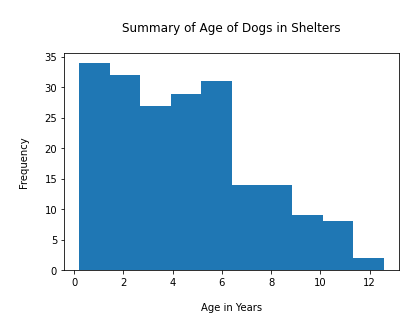

In [14]:
plt.hist(Age/12)
plt.title("\nSummary of Age of Dogs in Shelters\n")
plt.xlabel("\nAge in Years")
plt.ylabel("\nFrequency\n")
plt.show()

### Gender:

#### Assumptions:

Male   - 57%
Female - 43%
(Based on Dogs Trust Dataset)

#### Distribution:

Numpy.random.choice () was selected to generate the 'Gender' dataset as we have two options with attached probabilities for each i.e. male and female

#### Simulating the 'Gender' Dataset

In [15]:
#Create the Male/ Female object
sex = ['Male','Female']

#Set seed to produce a consistent result
np.random.seed(1)

#Use random.choice () to create an array with a probability of 57%:43% male:female ratio
Gender = np.random.choice(sex, size = 200, replace = True, p = [0.57,0.43])

#Populate the 'Gender' column with 200 samples.
df['Gender'] = Gender

In [16]:
#Option to show the dataset 
#print(df)

#### Plot the 'Gender' dataset result:

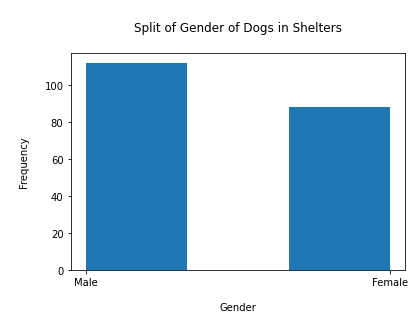

In [17]:
plt.hist (Gender,bins = 3)
plt.title("\nSplit of Gender of Dogs in Shelters\n")
plt.xlabel("\nGender")
plt.ylabel("\nFrequency\n")
plt.show()

### Pedigree:

#### Assumptions:

Purebred     - 21%
Crossbreed   - 79% (Based on Dogs Trust Dataset)

#### Distributions:

Numpy.random.choice () was one again selected to generate the 'Pedigree' dataset as we have two options with attached probabilities for each i.e. purebred and crossbreed.

#### Simulating the 'Pedigree' dataset:

In [18]:
#Create the pedigree object
pedigree = ['Purebred','Crossbreed']

#Set seed to produce a consistent result
np.random.seed(1)

#Use random.choice () to create an array with a probability of 21%:79% (Purebreed:Crossbreed)
Pedigree = np.random.choice(pedigree, size = 200, replace = True, p = [0.21,0.79])

#Populate the 'Pedigree' column with 200 samples.
df['Pedigree'] = Pedigree

In [19]:
#Option to show the dataset 
#print(df['Pedigree'])

#### Plot the 'Pedigree' dataset result:

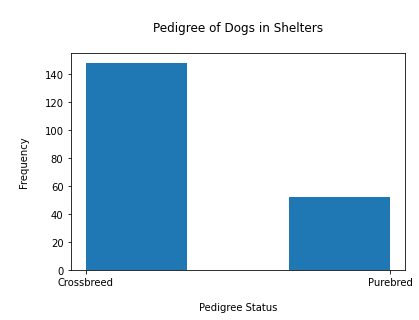

In [20]:
plt.hist (Pedigree, bins = 3)
plt.title("\nPedigree of Dogs in Shelters\n")
plt.xlabel("\nPedigree Status")
plt.ylabel("\nFrequency\n")
plt.show()

### Size:

#### Assumptions:
Small 22%; Medium 60%, Large 18%

#### Distribution:
Numpy.random.choice () was one again selected to generate the 'Size' dataset as we have two options with attached probabilities for each i.e. small, medium and large.

#### Simulating the 'Size' dataset:

In [21]:
#Create the Size Object
Status = ['Small','Medium','Large']

#Set seed to produce a consistent result
np.random.seed(1)

#Use random.choice () to create an array with a probability of 22%:60%:18%
Size = np.random.choice(Status, size = 200, replace = True, p = [.22,.6,.18])

#Populate the 'Size' column with Small, Medium,Large & X-Large samples
df['Size'] = Size

In [22]:
# Option to show the dataset 
#print(df['Size'])

#### Plot the 'Size' dataset results:

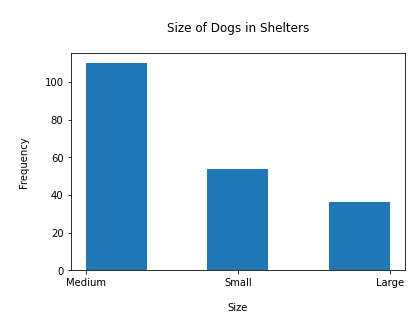

In [23]:
plt.hist (Size, bins = 5)
plt.title("\nSize of Dogs in Shelters\n")
plt.xlabel("\nSize")
plt.ylabel("\nFrequency\n")
plt.show()

### Risk:
Risk has been classified as 'Low', 'Medium', 'High' and 'V-High' based on known risk factors from the Dogs Trust and Austin datasets e.g. Age (4+ ); Gender (Male); Pedigree (Crossbred); Size (Medium) = High Risk

In [24]:
#To create data to populate a new column called 'At Risk' based on risk profile around age, gender, coat colour and size.
def Risk_Rating(row):

    if row['Age_Yrs'] > 10:
        return 'V-High'
    if row['Age_Yrs'] > 6 and row['Age_Yrs'] <= 10:
        return 'High' 
    if row['Age_Yrs'] > 3 and row['Age_Yrs'] <= 6 and row['Gender'] == 'Male' and row['Size'] == 'Medium' and row['Pedigree'] =='Crossbreed':
        return 'High'     
    if row['Age_Yrs'] > 3 and row['Age_Yrs'] <= 6 and row['Gender'] == 'Female' and row['Size'] == 'Medium' and row['Pedigree'] =='Crossbreed':
        return 'Medium' 
    if row['Age_Yrs'] > 3 and row['Age_Yrs'] <= 6 and row['Size'] != 'Medium':
        return 'Medium' 
    if row['Age_Yrs'] > 1 and row['Age_Yrs'] <= 3 and row['Gender'] == 'Male' and row['Size'] == 'Medium' and row['Pedigree'] =='Crossbreed':
        return 'Medium'   
    if row['Age_Yrs'] > 1 and row['Age_Yrs'] <= 3 and row['Gender'] == 'Female' and row['Size'] == 'Medium' and row['Pedigree'] =='Crossbreed':
        return 'Medium'       
    if row['Age_Yrs'] > 1 and row['Age_Yrs'] <= 3 and row['Size'] != 'Medium' and row['Pedigree'] =='Crossbreed' or row['Pedigree'] !='Crossbreed':
        return 'Low'     
    if row['Age_Yrs'] <= 1: 
        return 'Low'        
    else:
        return 'null'   

In [25]:
#To populate a column called 'Risk' in the dataframe from the results above  
df['Risk'] = df.apply(lambda row: Risk_Rating(row), axis=1)

In [26]:
#Option to show the dataset 
#print(df['Risk'])

In [27]:
#To check to ensure no 'null' values in the 'Risk' column
df['Risk'].reindex(index = ["Low", "Medium", "High","V-High"])
#https://stackoverflow.com/questions/30009948/how-to-reorder-indexed-rows-based-on-a-list-in-pandas-data-frame/3001000
(df.groupby( ['Risk'] ).count())

,Age_Mths,Age_Yrs,Gender,Pedigree,Size
Risk,,,,,
High,56,56,56,56,56
Low,57,57,57,57,57
Medium,79,79,79,79,79
V-High,8,8,8,8,8


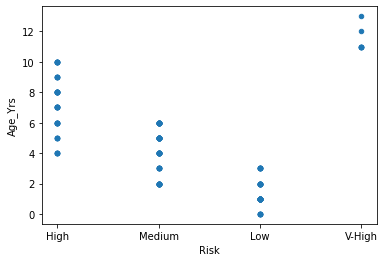

In [28]:
df.plot(x ='Risk', y='Age_Yrs', kind = 'scatter')
plt.show()

### Duration (Length of Stay):

Duration (Days) was calculated by allocating average length of stay based  to each risk classification i.e. 'Low', 'Medium', 'High' and 'V-High' 

#### Assumptions:

Average adoption time - 29 days

Split By Age Group: Puppies < 6 months - 20 days; 6-12 months - 28 days; Adult dogs (1-6 years) - 32 days; Seniors 7+ years - 72 days.

#### Distribution:



#### Simulating the 'Length of Stay' dataset:

In [29]:
#Length of Stay linked to Risk

def duration(risk):
    if risk == 'V-High':
        return np.random.triangular (30, 72, 90) # Risk equiv to > 7 yr old senior  
    if risk  == 'High':
        return np.random.triangular (1, 50, 60)  # Risk equiv to 7 yr old adult  
    if risk  == 'Medium':
        return np.random.triangular (1, 32, 40)  # Risk equiv to < 1-6 yr old adult (average 32)
    if risk  == 'Low':
        return np.random.normal(20, 3)           # Risk equiv to < 0-6 mth old puppy (average 20)

In [30]:
#To populate a column called 'Duration (Days)' in the dataframe from the results above  
pd.set_option("display.precision", 0) #Use 0 decimal places in output display
df['Duration (Days)'] = df['Risk'].apply(duration)

In [31]:
#Option to display the dataset
#df['Duration (Days)']  # generate dataframe 

#### Plot the Duration (Days) dataset:

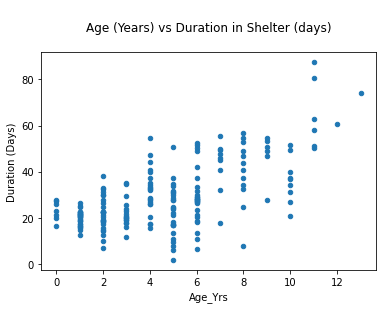

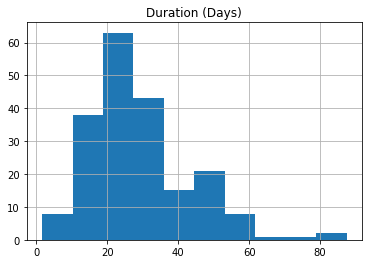

In [32]:
df.plot(x ='Age_Yrs', y='Duration (Days)', kind = 'scatter')
plt.title("\nAge (Years) vs Duration in Shelter (days)\n")
df.hist('Duration (Days)')
plt.show()

***

### Create a Summary of the Simulated Dataset:

In [33]:
#To delete unnecessary dataframes
#df = df.drop('%', axis=1)

In [34]:
#To check for missing values
pd.set_option("display.max_rows", 200)#Display all entries
df.isnull()
df.style.highlight_null(null_color='red'); #highlight any null values in red
#print(df.isnull()) # Option to print null value check

In [35]:
#To reset the index to start at 1 instead of zero
df.index = np.arange(1, len(df) + 1)

In [36]:
#To re-order the columns
df = df[['Duration (Days)', 'Age_Mths', 'Age_Yrs', 'Gender', 'Pedigree','Size','Risk']]

In [37]:
#To format the dataframe
#Display the DataFrame, rounding continuous variables to two decimal places
df.round({'Duration (Days)': 0, 'Age_Mths': 0, 'Age_Yrs': 0})
pd.set_option("display.precision", 0)# Use 0 decimal places in output display
pd.set_option('expand_frame_repr', False) #print dataframe on a single line
#https://stackoverflow.com/questions/39482722/how-to-print-dataframe-on-single-line
pd.set_option("display.max_rows", 200)#Display all entries
pd.options.display.max_columns = 7 #Print 7 Columns
df.style.highlight_null(null_color='red');

### Display the simulated dataset:

In [38]:
df

,Duration (Days),Age_Mths,Age_Yrs,Gender,Pedigree,Size,Risk
1,55,54,4,Male,Crossbreed,Medium,High
2,27,75,6,Female,Crossbreed,Medium,Medium
3,35,61,5,Male,Purebred,Small,Medium
4,44,54,4,Male,Crossbreed,Medium,High
5,19,41,3,Male,Purebred,Small,Low
6,28,66,6,Male,Purebred,Small,Medium
7,27,42,4,Male,Purebred,Small,Medium
8,53,106,9,Male,Crossbreed,Medium,High
9,81,127,11,Male,Crossbreed,Medium,V-High
10,23,37,3,Male,Crossbreed,Medium,Medium


In [39]:
pd.set_option("display.precision", 0)# Use 0 decimal places in output display
df.describe()

,Duration (Days),Age_Mths,Age_Yrs
count,200,200,200
mean,29,55,5
std,14,35,3
min,2,3,0
25%,19,25,2
50%,26,54,4
75%,35,75,6
max,87,151,13


In [40]:
#Option to group the dataset by attibute:

#pd.set_option("display.precision", 1)# Use 0 decimal places in output display
#df.groupby(['Age_Yrs']).count()/df.shape[0]*100 # show percentages
#df.groupby(['Gender']).count()/df.shape[0]*100 # show percentages
#df.groupby(['Pedigree']).count()/df.shape[0]*100 # show percentages
#df.groupby(['Size']).count()/df.shape[0]*100 # show percentages
#df.groupby(['Risk']).count()/df.shape[0]*100 # show percentages

##### Summary of Most Common Attributes in the Simulated Dataset
Age 1-3 (39%); Gender = Male (56%); Pedigree = Crossbreed (74%); Size = Medium (55%; Risk = Medium (37%)

### Plot the results as a scatterplot:

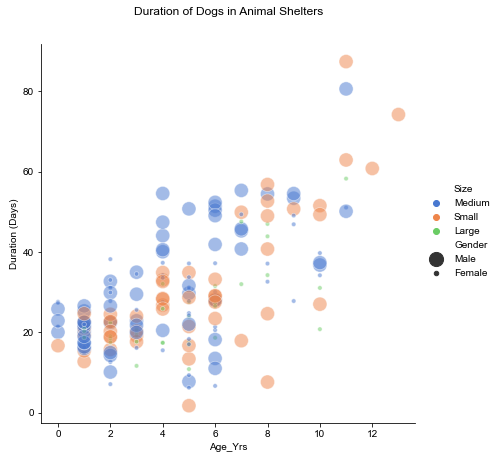

In [41]:
sns.relplot(x="Age_Yrs", y='Duration (Days)', hue='Size',size='Gender',sizes=(20, 200), alpha=.5, palette="muted",height=6, data=df)
fig_dims = (100, 24)
plt.title("Duration of Dogs in Animal Shelters\n\n")
sns.set_style ("whitegrid")
sns.set_style ("ticks")
plt.show()

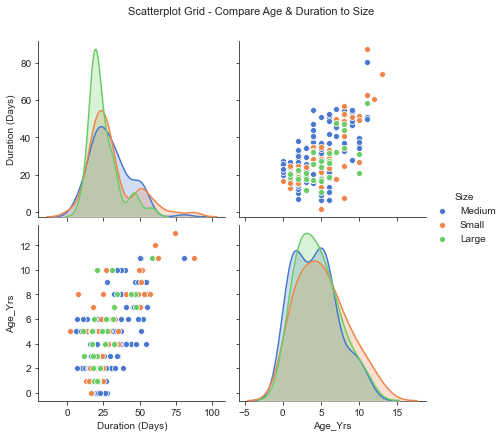

In [42]:
df = df.drop('Age_Mths', axis=1)
sns.set_style ("whitegrid")
sns.set_style ("ticks")
ax1 = sns.pairplot (df, hue="Size",height = 3,palette="muted" );
plt.subplots_adjust(top=0.9)
ax1.fig.suptitle ("Scatterplot Grid - Compare Age & Duration to Size\n\n", fontsize = 11)
a4_dims = (11.7, 8.27)# Scale to print on A4 sheet
fig, ax = sns.figsize = a4_dims
plt.show()

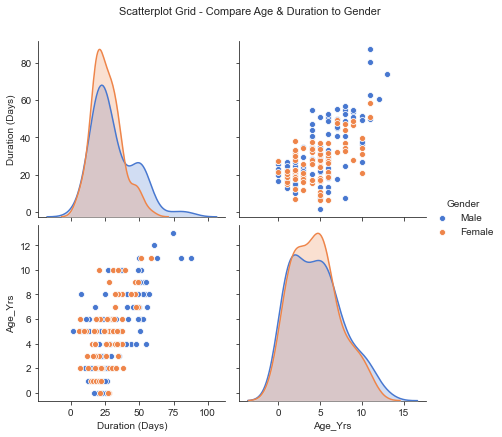

In [43]:
sns.set_style ("whitegrid")
sns.set_style ("ticks")
ax2 = sns.pairplot (df, hue="Gender",height = 3, palette="muted");
plt.subplots_adjust(top=0.9)
ax2.fig.suptitle ("Scatterplot Grid - Compare Age & Duration to Gender\n\n", fontsize = 11)
plt.show()

### References:
Irish Study: https://www.thejournal.ie/dogs-abandoned-5194543-Sep2020/

UK Study: https://veterinaryrecord.bmj.com/content/161/9/283.2

UK Dogs Trust study:https://www.tandfonline.com/doi/full/10.1080/10888700903369255

UK Study: https://www.tandfonline.com/doi/abs/10.1080/10888700903369255?journalCode=haaw20

US Study: https://www.aspca.org/animal-homelessness/shelter-intake-and-surrender/pet-statistics

US Study: https://www.petfinder.com/pet-adoption/dog-adoption/pets-relinquished-shelters/

US Study: https://pubmed.ncbi.nlm.nih.gov/32575574/#&gid=article-figures&pid=figure-2-uid-1

US Study: https://news.orvis.com/dogs/when-is-it-time-to-surrender-your-dog

US Study: https://faunalytics.org/understanding-the-factors-that-lead-to-successful-dog-adoptions/

US Study: https://pubmed.ncbi.nlm.nih.gov/29557174/

US Study: https://apnews.com/article/218042cf3f684525874f48ae990ed49b

US Study: https://www.hillspet.com/dog-care/new-pet-parent/common-reasons-adopted-dogs-are-returned-to-shelters

US Study: https://www.companionanimalpsychology.com/2013/03/what-influences-dogs-length-of-stay-at.html

US Re-homing stats:https://data.world/rdowns26/austin-animal-shelter/workspace/file?filename=Project+Report.pdf

US Older dog study:https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5867524/

US Study: https://data.world/rdowns26/austin-animal-shelter/workspace/file?filename=Austin_Animal_Center_Intakes.csv

https://thispointer.com/pandas-skip-rows-while-reading-csv-file-to-a-dataframe-using-read_csv-in-python/

https://stackoverflow.com/questions/32249960/in-python-pandas-start-row-index-from-1-instead-of-zero-without-creating-additi

https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/

https://stackoverflow.com/questions/23377108/pandas-percentage-of-total-with-groupby

https://stackoverflow.com/questions/30009948/how-to-reorder-indexed-rows-based-on-a-list-in-pandas-data-frame/3001000

https://stackoverflow.com/questions/39482722/how-to-print-dataframe-on-single-line


END